In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/playground-series-s3e24'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_data = pd.read_csv("/kaggle/input/playground-series-s3e24/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv")

In [4]:
print(train_data.shape)
print(test_data.shape)

(159256, 24)
(106171, 23)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [6]:
def reduce_features(df):
    df['eyesight_diff'] = (df['eyesight(left)'] - df['eyesight(right)'])

    # Calculate the mean of left and right hearing
    df['hearing_diff'] = (df['hearing(left)'] - df['hearing(right)'])

    # Drop the original columns
    df = df.drop(['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)'], axis=1)

    return df

train_data = reduce_features(train_data)
test_data = reduce_features(test_data)

In [7]:
train_data.nunique()

id                     159256
age                        18
height(cm)                 14
weight(kg)                 28
waist(cm)                 531
systolic                  112
relaxation                 75
fasting blood sugar       229
Cholesterol               227
triglyceride              392
HDL                       108
LDL                       222
hemoglobin                134
Urine protein               6
serum creatinine           28
AST                       140
ALT                       188
Gtp                       362
dental caries               2
smoking                     2
eyesight_diff              90
hearing_diff                3
dtype: int64

In [8]:
test_id = test_data['id']
train_data = train_data.drop(columns=['id', 'waist(cm)'])
test_data = test_data.drop(columns=['id', 'waist(cm)'])

In [9]:
y = train_data['smoking']

In [10]:
test_data

,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,eyesight_diff,hearing_diff
0,40,165,70,130,89,107,200,186,49,115,14.2,1,0.9,19,25,32,0,0.0,0
1,80,160,60,144,72,93,172,158,35,104,13.0,1,1.1,20,12,24,0,0.0,0
2,60,170,70,117,75,92,161,173,39,88,15.4,1,1.4,38,60,36,0,-0.1,0
3,40,160,50,116,62,91,213,47,75,128,14.5,1,0.6,25,18,10,1,-0.1,0
4,40,170,75,132,94,79,170,100,39,123,16.5,1,1.0,30,39,27,1,0.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,40,165,60,112,78,134,225,82,59,149,16.4,1,1.1,24,31,28,0,-0.1,0
106167,40,170,85,130,90,97,180,186,44,100,16.0,2,1.0,25,31,38,0,0.0,0
106168,35,170,85,131,86,106,211,76,53,142,15.9,1,0.8,33,32,24,1,0.0,0
106169,40,160,60,120,80,92,175,81,55,103,13.9,1,0.6,42,36,32,0,-0.1,0


In [11]:
train_data

,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,eyesight_diff,hearing_diff
0,55,165,60,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1,-0.1,0
1,70,165,65,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0,-0.1,0
2,20,170,75,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1,-0.1,0
3,35,180,95,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0,0.3,0
4,30,165,60,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,127,80,64,238,47,72,159,14.5,1,0.8,25,26,13,0,0,-0.5,0
159252,50,155,75,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,0,0.0,0
159253,40,160,50,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,0,0.5,0
159254,50,165,75,121,90,122,165,148,55,80,14.4,1,1.1,22,17,37,0,1,0.2,0


In [12]:
train_data['hearing_diff'].value_counts()

hearing_diff
 0    155964
 1      1690
-1      1602
Name: count, dtype: int64

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   systolic             159256 non-null  int64  
 4   relaxation           159256 non-null  int64  
 5   fasting blood sugar  159256 non-null  int64  
 6   Cholesterol          159256 non-null  int64  
 7   triglyceride         159256 non-null  int64  
 8   HDL                  159256 non-null  int64  
 9   LDL                  159256 non-null  int64  
 10  hemoglobin           159256 non-null  float64
 11  Urine protein        159256 non-null  int64  
 12  serum creatinine     159256 non-null  float64
 13  AST                  159256 non-null  int64  
 14  ALT                  159256 non-null  int64  
 15  Gtp              

In [14]:
binary_categorical_cols = []

for column in train_data.columns:
    unique_values = train_data[column].unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        binary_categorical_cols.append(column)

print("Categorical Columns:", binary_categorical_cols)

Categorical Columns: ['dental caries', 'smoking']


In [15]:
train_data.nunique()

age                     18
height(cm)              14
weight(kg)              28
systolic               112
relaxation              75
fasting blood sugar    229
Cholesterol            227
triglyceride           392
HDL                    108
LDL                    222
hemoglobin             134
Urine protein            6
serum creatinine        28
AST                    140
ALT                    188
Gtp                    362
dental caries            2
smoking                  2
eyesight_diff           90
hearing_diff             3
dtype: int64

In [16]:
train_data['Urine protein'].value_counts()

Urine protein
1    150862
2      5609
3      2228
4       477
5        74
6         6
Name: count, dtype: int64

In [17]:
categorical_cols = ['smoking','dental caries','hearing_diff','Urine protein']

In [18]:
train_to_scale = train_data.drop(categorical_cols,axis =1)
train_to_ohe = train_data[categorical_cols]

categorical_cols.remove('smoking')
test_to_scale = test_data.drop(categorical_cols,axis =1)
test_to_ohe = test_data[categorical_cols]


In [19]:
# EDA

Counts of Smoking Status:
 smoking
0    89603
1    69653
Name: count, dtype: int64


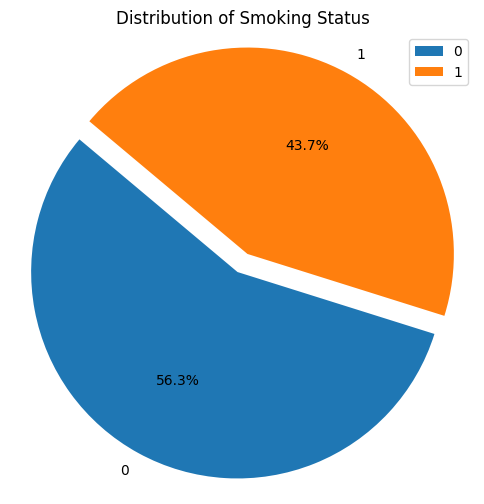

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


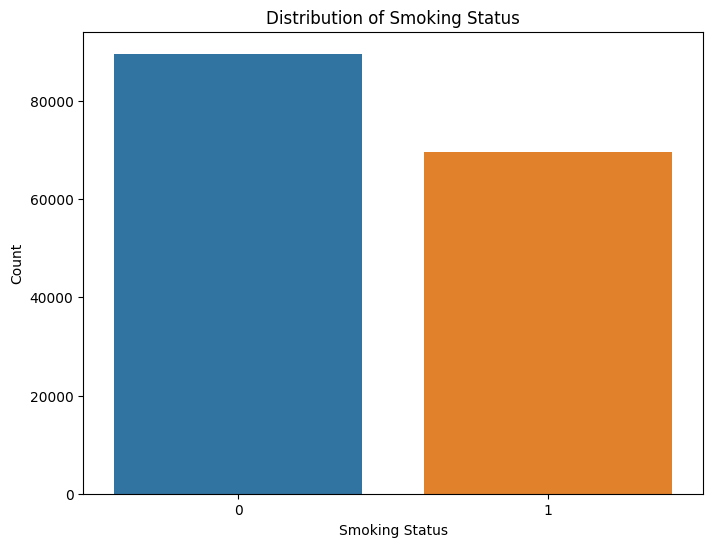

In [20]:
# 1. Visualize the distribution of 'smoking' using a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size for better readability
count_values = train_data['smoking'].value_counts()

# Create a pie chart with explode to emphasize slices
plt.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=140, explode=(0, 0.1))
plt.title('Distribution of Smoking Status')
plt.axis('equal')  # Ensure the pie chart is displayed as a circle
plt.legend(count_values.index, loc="best")  # Add a legend for better understanding

# Display the counts of smoking status
print("Counts of Smoking Status:\n", count_values)

plt.show()

# 2. Visualize the distribution of 'smoking' using a count plot in Seaborn
plt.figure(figsize=(8, 6))  # Set figure size for better readability

# Create a count plot using Seaborn
sns.countplot(data=train_data, x='smoking')
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

# Display the counts of smoking status
count_values = train_data['smoking'].value_counts()

plt.show()

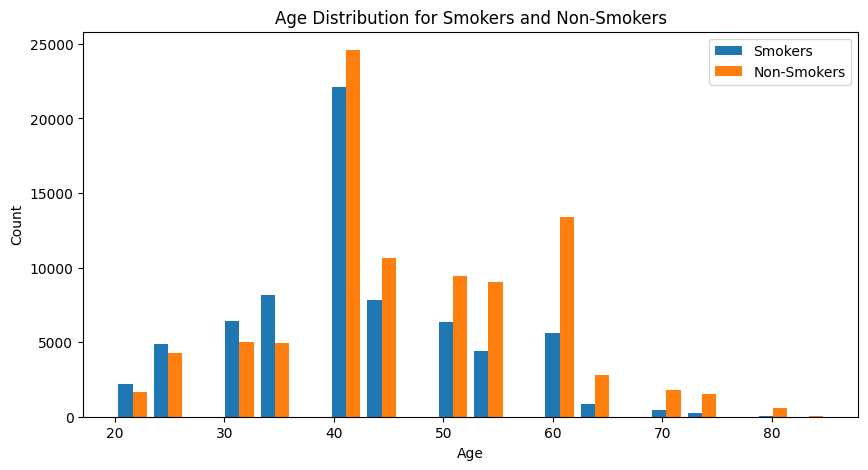

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


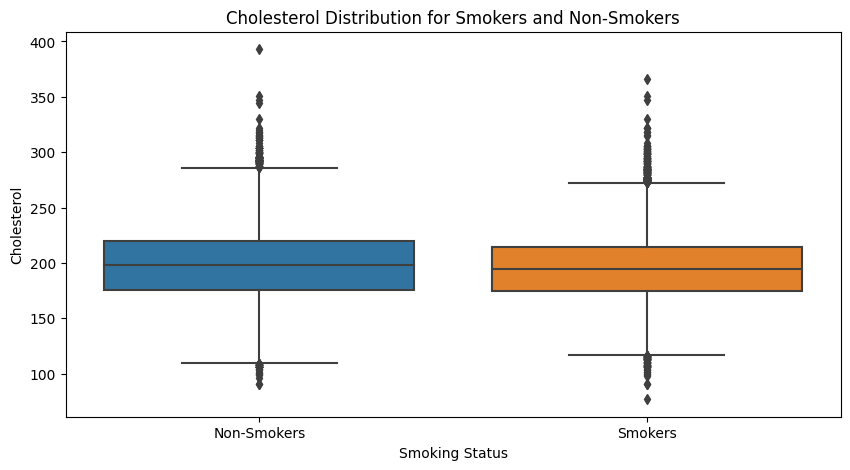

In [21]:
# Separate data into smokers and non-smokers
smokers = train_data[train_data['smoking'] == 1]
non_smokers = train_data[train_data['smoking'] == 0]

# Visualize using various plots
# For demonstration purposes, using a few common plots:

# 1. Histogram for Age
plt.figure(figsize=(10, 5))
plt.hist([smokers['age'], non_smokers['age']], bins=20, label=['Smokers', 'Non-Smokers'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Age Distribution for Smokers and Non-Smokers')
plt.show()

# 2. Box Plot for Cholesterol
plt.figure(figsize=(10, 5))
sns.boxplot(x='smoking', y='Cholesterol', data=train_data)
plt.xlabel('Smoking Status')
plt.ylabel('Cholesterol')
plt.xticks([0, 1], ['Non-Smokers', 'Smokers'])
plt.title('Cholesterol Distribution for Smokers and Non-Smokers')
plt.show()

# # 3. Countplot for age distribution based on smoking status using seaborn
# plt.figure(figsize=(10, 5))
# sns.countplot(x='age', hue='smoking', data=train_data)
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.title('Age Distribution for Smokers and Non-Smokers')
# plt.legend(title='Smoking', labels=['Non-Smokers', 'Smokers'])
# plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

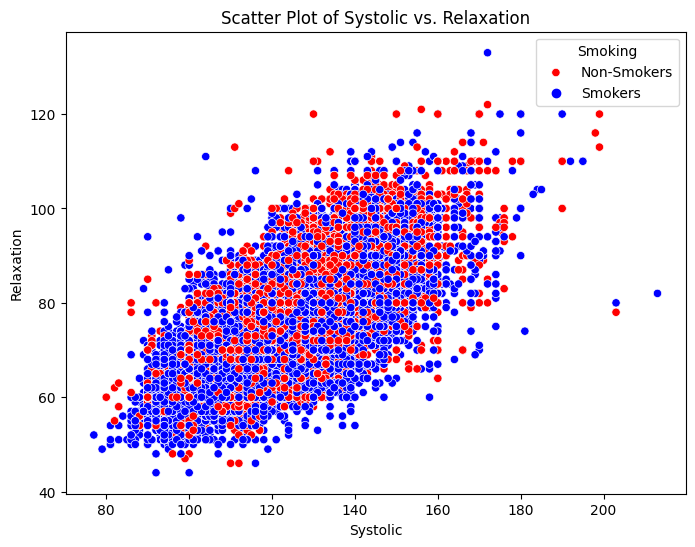

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

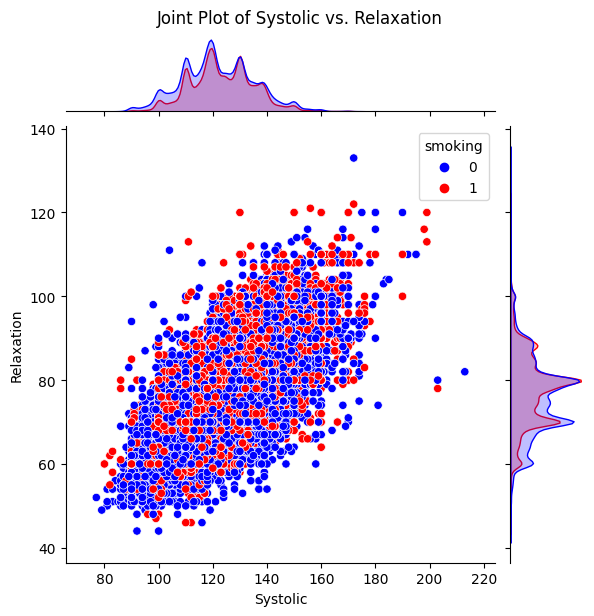

In [22]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='systolic', y='relaxation', data=train_data, hue='smoking', palette=['blue', 'red'])
plt.xlabel('Systolic')
plt.ylabel('Relaxation')
plt.title('Scatter Plot of Systolic vs. Relaxation')
plt.legend(title='Smoking', labels=['Non-Smokers', 'Smokers'])
plt.show()

# Joint Plot (includes histograms)
sns.jointplot(x='systolic', y='relaxation', data=train_data, kind='scatter', hue='smoking', palette=['blue', 'red'])
plt.xlabel('Systolic')
plt.ylabel('Relaxation')
plt.suptitle('Joint Plot of Systolic vs. Relaxation', y=1.02)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


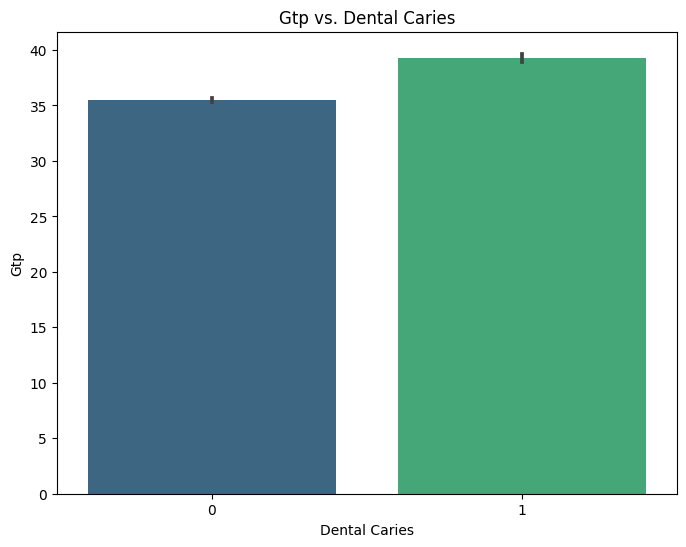

In [23]:
# Create a bar plot to visualize the relationship between the
# 'dental caries' variable (categorical) on the x-axis
# and the 'Gtp' variable (numeric) on the y-axis
plt.figure(figsize=(8, 6))
sns.barplot(x='dental caries', y='Gtp', data=train_data, palette='viridis')
plt.xlabel('Dental Caries')
plt.ylabel('Gtp')
plt.title('Gtp vs. Dental Caries')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

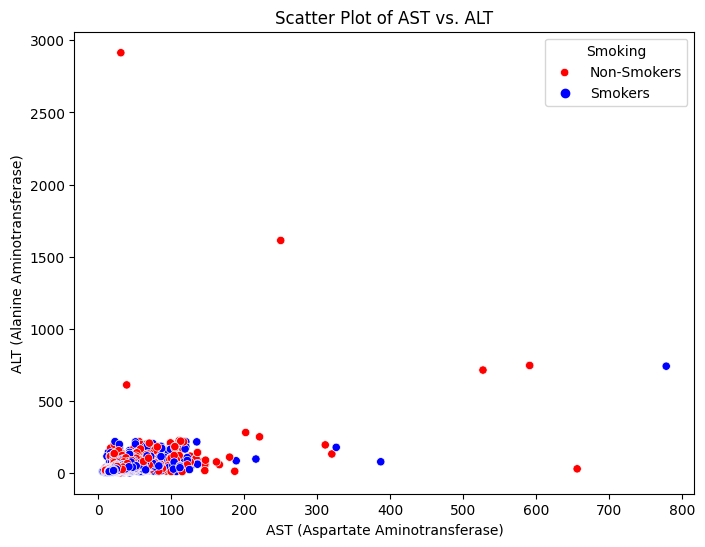

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

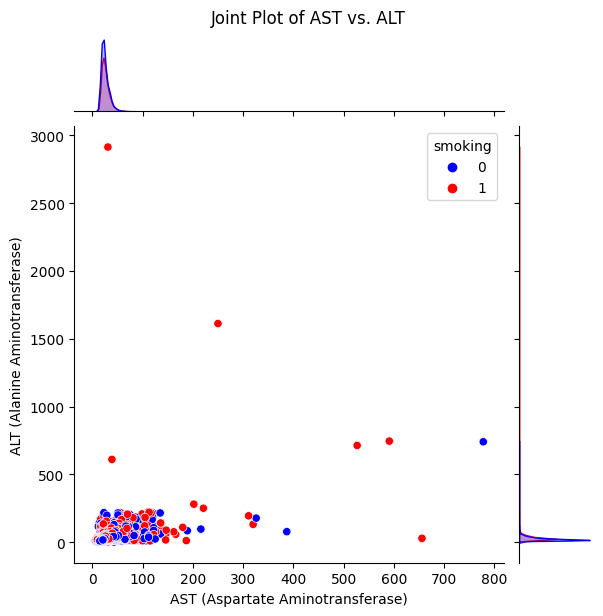

In [24]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AST', y='ALT', data=train_data, hue='smoking', palette=['blue', 'red'])
plt.xlabel('AST (Aspartate Aminotransferase)')
plt.ylabel('ALT (Alanine Aminotransferase)')
plt.title('Scatter Plot of AST vs. ALT')
plt.legend(title='Smoking', labels=['Non-Smokers', 'Smokers'])
plt.show()

# Joint Plot (includes histograms)
sns.jointplot(x='AST', y='ALT', data=train_data, kind='scatter', hue='smoking', palette=['blue', 'red'])
plt.xlabel('AST (Aspartate Aminotransferase)')
plt.ylabel('ALT (Alanine Aminotransferase)')
plt.suptitle('Joint Plot of AST vs. ALT', y=1.02)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

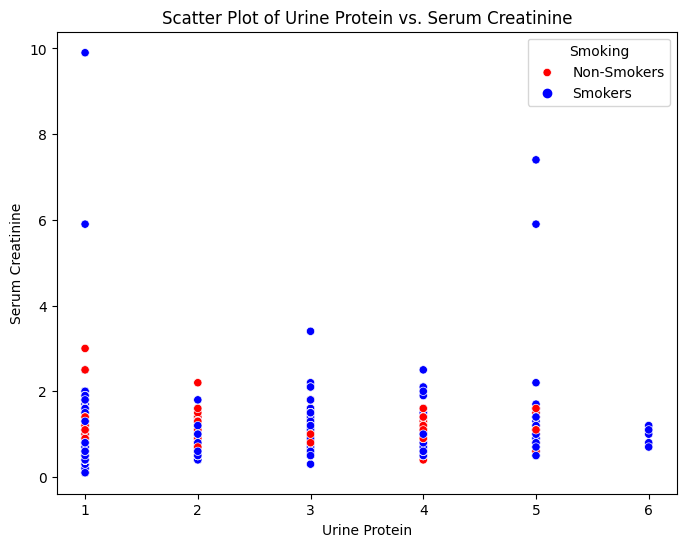

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

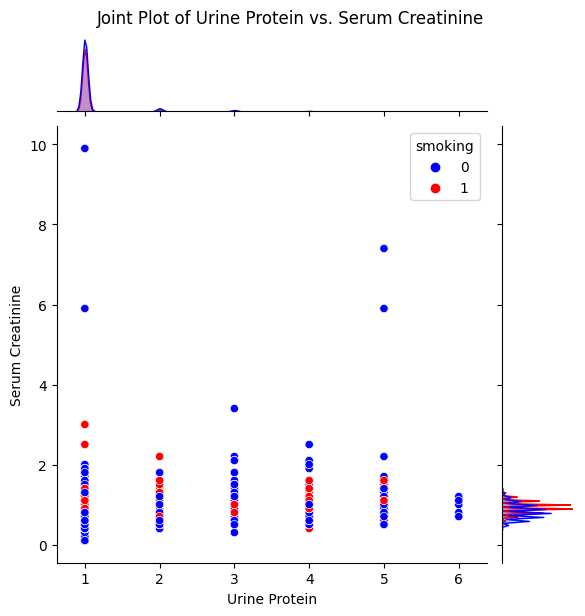

In [25]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Urine protein', y='serum creatinine', data=train_data, hue='smoking', palette=['blue', 'red'])
plt.xlabel('Urine Protein')
plt.ylabel('Serum Creatinine')
plt.title('Scatter Plot of Urine Protein vs. Serum Creatinine')
plt.legend(title='Smoking', labels=['Non-Smokers', 'Smokers'])
plt.show()

# Joint Plot (includes histograms)
sns.jointplot(x='Urine protein', y='serum creatinine', data=train_data, kind='scatter', hue='smoking', palette=['blue', 'red'])
plt.xlabel('Urine Protein')
plt.ylabel('Serum Creatinine')
plt.suptitle('Joint Plot of Urine Protein vs. Serum Creatinine', y=1.02)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

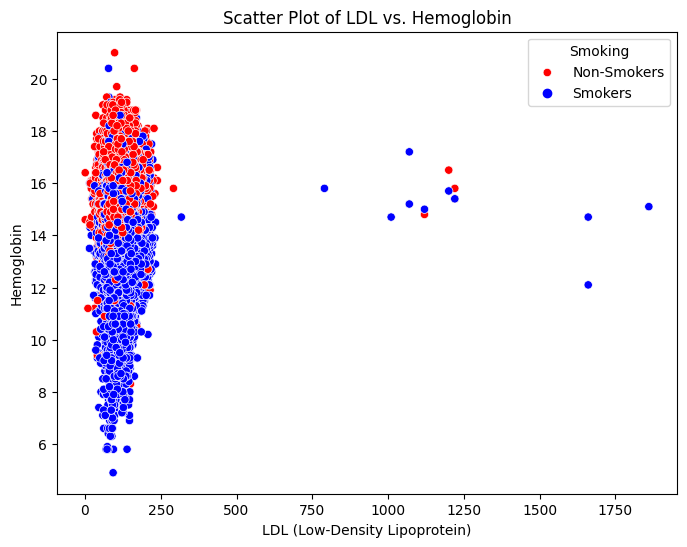

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

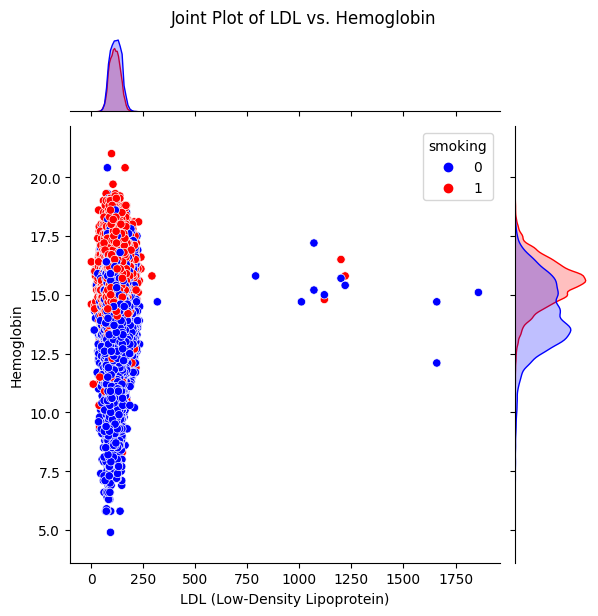

In [26]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LDL', y='hemoglobin', data=train_data, hue='smoking', palette=['blue', 'red'])
plt.xlabel('LDL (Low-Density Lipoprotein)')
plt.ylabel('Hemoglobin')
plt.title('Scatter Plot of LDL vs. Hemoglobin')
plt.legend(title='Smoking', labels=['Non-Smokers', 'Smokers'])
plt.show()

# Joint Plot (includes histograms)
sns.jointplot(x='LDL', y='hemoglobin', data=train_data, kind='scatter', hue='smoking', palette=['blue', 'red'])
plt.xlabel('LDL (Low-Density Lipoprotein)')
plt.ylabel('Hemoglobin')
plt.suptitle('Joint Plot of LDL vs. Hemoglobin', y=1.02)
plt.show()

In [27]:
# pair_plot_cols=[f for f in train_data.columns if train_data[f].nunique()>100]
# print(pair_plot_cols)
# sns.set(font_scale=1)
# plt.figure(figsize=(18, 10))
# sns.set(style="ticks", color_codes=True)
# sns.pairplot(data=train_data, vars=pair_plot_cols,diag_kind='kde', 
#         kind='scatter', palette='muted', 
#         plot_kws={'s': 20}, hue='smoking')
# plt.show()

In [28]:
from prettytable import PrettyTable
from itertools import combinations

correlation_matrix = train_to_scale.corr()


table = PrettyTable()
table.field_names = ["Column 1", "Column 2", "Correlation"]


for col1, col2 in combinations(correlation_matrix.columns, 2):
    correlation = correlation_matrix.at[col1, col2]
    table.add_row([col1, col2, f"{correlation:.2f}"])
table.sortby = "Correlation"

print(table)

+---------------------+---------------------+-------------+
|       Column 1      |       Column 2      | Correlation |
+---------------------+---------------------+-------------+
|     Cholesterol     |    eyesight_diff    |    -0.00    |
|         LDL         |    eyesight_diff    |    -0.00    |
| fasting blood sugar |    eyesight_diff    |    -0.00    |
|      height(cm)     |    eyesight_diff    |    -0.00    |
|      hemoglobin     |    eyesight_diff    |    -0.00    |
|       systolic      |    eyesight_diff    |    -0.00    |
|     triglyceride    |    eyesight_diff    |    -0.00    |
|         ALT         |    eyesight_diff    |    -0.01    |
|         AST         |    eyesight_diff    |    -0.01    |
|     Cholesterol     |   serum creatinine  |    -0.01    |
|         Gtp         |    eyesight_diff    |    -0.01    |
|      relaxation     |    eyesight_diff    |    -0.01    |
|      weight(kg)     |    eyesight_diff    |    -0.01    |
|         age         |     triglyceride

In [29]:
# Preprocessing

In [30]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()

scaled_train_data = pd.DataFrame(sc.fit_transform(train_to_scale),columns = train_to_scale.columns)
scaled_test_data = pd.DataFrame(sc.transform(test_to_scale),columns = test_to_scale.columns)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [31]:
scaled_train_data.head()

,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,eyesight_diff
0,1.000000,0.0,-0.333333,0.8750,0.750000,-0.153846,-0.571429,2.102273,-0.736842,-1.026316,0.75,0.5,-0.222222,0.1875,0.000000,-0.5
1,2.000000,0.0,0.000000,1.5625,0.416667,3.923077,-0.047619,-0.681818,0.157895,0.315789,0.60,1.0,0.333333,0.0625,0.384615,-0.5
2,-1.333333,0.5,0.666667,-0.1875,-0.250000,-1.307692,-0.428571,0.931818,-0.473684,-0.552632,1.20,-0.5,0.333333,0.5625,1.000000,-0.5
3,-0.333333,1.5,2.000000,0.6250,0.833333,-0.384615,-0.380952,1.000000,-0.842105,-0.315789,0.45,0.5,-0.444444,0.3125,0.115385,1.5
4,-0.666667,0.0,-0.333333,0.0000,-0.166667,-0.384615,-0.976190,-0.318182,-0.526316,-0.552632,0.20,-0.5,-0.555556,-0.5625,-0.384615,2.5


In [32]:
scaled_train_data.describe()

,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,eyesight_diff
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,0.287108,0.026693,0.142911,0.093978,-0.093827,0.180966,-0.004853,0.143364,0.097510,0.015992,-0.101517,-0.036178,0.168539,0.284394,0.354462,0.024046
std,0.789486,0.881897,0.839080,0.795582,0.749553,1.179211,0.676118,0.752148,0.734955,0.741025,0.715607,0.896730,1.051654,1.109567,1.200179,2.085379
min,-1.333333,-3.000000,-2.333333,-2.750000,-2.833333,-3.846154,-2.833333,-1.215909,-2.368421,-2.973684,-5.050000,-4.000000,-2.000000,-1.312500,-0.961538,-49.000000
25%,0.000000,-0.500000,-0.333333,-0.437500,-0.666667,-0.461538,-0.500000,-0.431818,-0.473684,-0.500000,-0.600000,-0.500000,-0.444444,-0.375000,-0.346154,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.500000,0.666667,0.562500,0.333333,0.538462,0.500000,0.568182,0.526316,0.500000,0.400000,0.500000,0.555556,0.625000,0.653846,0.500000
max,3.000000,2.500000,4.333333,5.750000,4.583333,21.461538,4.690476,7.397727,4.315789,45.947368,3.000000,45.000000,83.777778,180.750000,37.384615,49.000000


In [33]:
# One Hot Encoding the categorical columns

train_to_ohe.columns

Index(['smoking', 'dental caries', 'hearing_diff', 'Urine protein'], dtype='object')

In [34]:
ohe_train_data = pd.get_dummies(train_to_ohe, columns = ['hearing_diff', 'Urine protein', 'dental caries'])
ohe_test_data  = pd.get_dummies(test_to_ohe, columns = ['hearing_diff', 'Urine protein', 'dental caries'])

In [35]:
ohe_train_data.head()

,smoking,hearing_diff_-1,hearing_diff_0,hearing_diff_1,Urine protein_1,Urine protein_2,Urine protein_3,Urine protein_4,Urine protein_5,Urine protein_6,dental caries_0,dental caries_1
0,1,False,True,False,True,False,False,False,False,False,True,False
1,0,False,True,False,True,False,False,False,False,False,False,True
2,1,False,True,False,True,False,False,False,False,False,True,False
3,0,False,True,False,True,False,False,False,False,False,False,True
4,1,False,True,False,True,False,False,False,False,False,True,False


In [36]:
for i in ohe_train_data.columns : 
    ohe_train_data[i] = ohe_train_data[i].apply(lambda x :0.9 if x ==1 else 0.1)

In [37]:
ohe_train_data.drop(['smoking'],axis = 1,inplace = True)

In [38]:
# Joining the columns after scaling and one-hot encoding

ohe_train_data = ohe_train_data.reset_index(drop = True)
ohe_test_data = ohe_test_data.reset_index(drop = True)
ohe_train_data.head()

,hearing_diff_-1,hearing_diff_0,hearing_diff_1,Urine protein_1,Urine protein_2,Urine protein_3,Urine protein_4,Urine protein_5,Urine protein_6,dental caries_0,dental caries_1
0,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.9,0.1
1,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.9
2,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.9,0.1
3,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.9
4,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.9,0.1


In [39]:
scaled_train_data  = scaled_train_data.reset_index(drop =True)
scaled_test_data  = scaled_test_data.reset_index(drop =True)

In [40]:
y = y.reset_index(drop = True)

In [41]:
X_train = pd.concat([ohe_train_data,scaled_train_data,y],axis =1)
test_df = pd.concat([ohe_test_data,scaled_test_data],axis =1)
X_train.head()

,hearing_diff_-1,hearing_diff_0,hearing_diff_1,Urine protein_1,Urine protein_2,Urine protein_3,Urine protein_4,Urine protein_5,Urine protein_6,dental caries_0,...,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,eyesight_diff,smoking
0,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.9,...,2.102273,-0.736842,-1.026316,0.75,0.5,-0.222222,0.1875,0.000000,-0.5,1
1,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.1,...,-0.681818,0.157895,0.315789,0.60,1.0,0.333333,0.0625,0.384615,-0.5,0
2,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.9,...,0.931818,-0.473684,-0.552632,1.20,-0.5,0.333333,0.5625,1.000000,-0.5,1
3,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.1,...,1.000000,-0.842105,-0.315789,0.45,0.5,-0.444444,0.3125,0.115385,1.5,0
4,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.9,...,-0.318182,-0.526316,-0.552632,0.20,-0.5,-0.555556,-0.5625,-0.384615,2.5,1


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hearing_diff_-1      159256 non-null  float64
 1   hearing_diff_0       159256 non-null  float64
 2   hearing_diff_1       159256 non-null  float64
 3   Urine protein_1      159256 non-null  float64
 4   Urine protein_2      159256 non-null  float64
 5   Urine protein_3      159256 non-null  float64
 6   Urine protein_4      159256 non-null  float64
 7   Urine protein_5      159256 non-null  float64
 8   Urine protein_6      159256 non-null  float64
 9   dental caries_0      159256 non-null  float64
 10  dental caries_1      159256 non-null  float64
 11  age                  159256 non-null  float64
 12  height(cm)           159256 non-null  float64
 13  weight(kg)           159256 non-null  float64
 14  systolic             159256 non-null  float64
 15  relaxation       

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hearing_diff_-1      106171 non-null  bool   
 1   hearing_diff_0       106171 non-null  bool   
 2   hearing_diff_1       106171 non-null  bool   
 3   Urine protein_1      106171 non-null  bool   
 4   Urine protein_2      106171 non-null  bool   
 5   Urine protein_3      106171 non-null  bool   
 6   Urine protein_4      106171 non-null  bool   
 7   Urine protein_5      106171 non-null  bool   
 8   Urine protein_6      106171 non-null  bool   
 9   dental caries_0      106171 non-null  bool   
 10  dental caries_1      106171 non-null  bool   
 11  age                  106171 non-null  float64
 12  height(cm)           106171 non-null  float64
 13  weight(kg)           106171 non-null  float64
 14  systolic             106171 non-null  float64
 15  relaxation       

In [44]:
X_train['smoking'].value_counts()

smoking
0    89603
1    69653
Name: count, dtype: int64

In [45]:
from imblearn.under_sampling import TomekLinks

y = X_train[['smoking']]
X = X_train.drop('smoking',axis =1)

def tomek_links (X,y) : 
    tl = TomekLinks(sampling_strategy='auto')

    X_resampled, y_resampled = tl.fit_resample(X, y)
    
    return X_resampled , y_resampled

X_resampled, y_resampled = tomek_links (X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [46]:
X_train = pd.concat([X_resampled,y_resampled], axis =1)
X_train['smoking'].value_counts()

smoking
0    81573
1    69653
Name: count, dtype: int64

In [47]:
# Model Training

In [48]:
test_data

,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,eyesight_diff,hearing_diff
0,40,165,70,130,89,107,200,186,49,115,14.2,1,0.9,19,25,32,0,0.0,0
1,80,160,60,144,72,93,172,158,35,104,13.0,1,1.1,20,12,24,0,0.0,0
2,60,170,70,117,75,92,161,173,39,88,15.4,1,1.4,38,60,36,0,-0.1,0
3,40,160,50,116,62,91,213,47,75,128,14.5,1,0.6,25,18,10,1,-0.1,0
4,40,170,75,132,94,79,170,100,39,123,16.5,1,1.0,30,39,27,1,0.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,40,165,60,112,78,134,225,82,59,149,16.4,1,1.1,24,31,28,0,-0.1,0
106167,40,170,85,130,90,97,180,186,44,100,16.0,2,1.0,25,31,38,0,0.0,0
106168,35,170,85,131,86,106,211,76,53,142,15.9,1,0.8,33,32,24,1,0.0,0
106169,40,160,60,120,80,92,175,81,55,103,13.9,1,0.6,42,36,32,0,-0.1,0


In [49]:
# XGBoost (GPU Version)

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, auc
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define number of splits for cross-validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store accuracy scores and best model
acc_scores_xgboost_gpu = []
best_model_xgboost_gpu = None
best_acc_xgboost_gpu = 0.0

# Define your features and target variable
X = X_resampled
y = y_resampled

# Define hyperparameters for XGBoost Classifier (GPU Version)
params_xgboost_gpu = {
    'learning_rate': 0.019093223225293453,
    'colsample_bytree': 0.21329015151846925,
    'colsample_bylevel': 0.9148369225084079,
    'subsample': 0.8831564960046078,
    'reg_alpha': 1.1496763786731952e-05,
    'reg_lambda': 7.512814356733987e-07,
    'max_depth': 12,
    'n_estimators': 1950,
    'min_child_weight': 21,
    'tree_method': 'gpu_hist',
    'eval_metric': 'auc',
    'booster': 'gbtree',
    'n_jobs': -1,
    'verbosity': 0
}

# Perform cross-validation and train XGBoost Classifier (GPU Version)
for train_index, test_index in tqdm(skf.split(X, y), total=n_splits):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost Classifier (GPU Version)
    model = xgb.XGBClassifier(**params_xgboost_gpu)

    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_pred_proba_xgboost_gpu = model.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC score
    acc = roc_auc_score(y_test, y_pred_proba_xgboost_gpu)
    acc_scores_xgboost_gpu.append(acc)

    # Store the best model based on the highest ROC AUC score
    if acc > best_acc_xgboost_gpu:
        best_acc_xgboost_gpu = acc
        best_model_xgboost_gpu = model

# Print the best ROC AUC score and all AUC scores obtained from cross-validation
print("Best ROC AUC Score (XGBoost - GPU Version):", best_acc_xgboost_gpu)
print("AUC Scores (XGBoost - GPU Version):", acc_scores_xgboost_gpu)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
  0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.

Best ROC AUC Score (XGBoost - GPU Version): 0.8928641086305096
AUC Scores (XGBoost - GPU Version): [0.8861650685261546, 0.8908306043564864, 0.8900445573028117, 0.8860482762638182, 0.890245487233738, 0.8884761688877265, 0.891691781733938, 0.8918672417764051, 0.8928641086305096, 0.8898481971848067]


In [50]:
# XGBoost (CPU Version)

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

# Define number of splits for cross-validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store accuracy scores and best model
acc_scores_xgboost_cpu = []
best_model_xgboost_cpu = None
best_acc_xgboost_cpu = 0.0

# Define your features and target variable
X = X_resampled
y = y_resampled

# Define hyperparameters for XGBoost Classifier (CPU Version)
params_xgboost_cpu = {
    'learning_rate': 0.019093223225293453,
    'colsample_bytree': 0.21329015151846925,
    'colsample_bylevel': 0.9148369225084079,
    'subsample': 0.8831564960046078,
    'reg_alpha': 1.1496763786731952e-05,
    'reg_lambda': 7.512814356733987e-07,
    'max_depth': 12,
    'n_estimators': 1950,
    'min_child_weight': 21,
    'eval_metric': 'auc',
    'booster': 'gbtree',
    'verbosity': 0
}

# Perform cross-validation and train XGBoost Classifier (CPU Version)
for train_index, test_index in tqdm(skf.split(X, y), total=n_splits):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost Classifier (CPU Version)
    model = xgb.XGBClassifier(**params_xgboost_cpu)
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_pred_proba_xgboost_cpu = model.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC score
    acc = roc_auc_score(y_test, y_pred_proba_xgboost_cpu)
    acc_scores_xgboost_cpu.append(acc)

    # Store the best model based on the highest ROC AUC score
    if acc > best_acc_xgboost_cpu:
        best_acc_xgboost_cpu = acc
        best_model_xgboost_cpu = model

# Print the best ROC AUC score and all AUC scores obtained from cross-validation
print("Best ROC AUC Score (XGBoost - CPU Version):", best_acc_xgboost_cpu)
print("AUC Scores (XGBoost - CPU Version):", acc_scores_xgboost_cpu)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
  0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.

Best ROC AUC Score (XGBoost - CPU Version): 0.8928184856751928
AUC Scores (XGBoost - CPU Version): [0.8854544504523645, 0.890163886793737, 0.8895953888149206, 0.8857369975996326, 0.8894811148165441, 0.8888317625672579, 0.8913974415062053, 0.8913852349014553, 0.8928184856751928, 0.890001400195253]


In [51]:
# Random Forest

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier

# Define number of splits for cross-validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store accuracy scores and best model
acc_scores_rf = []
best_model_rf = None
best_acc_rf = 0.0

# Define your features and target variable
X = X_resampled
y = y_resampled

# Define hyperparameters for Random Forest Classifier
params_rf = {
    'n_estimators': 100,  # Adjust the number of trees in the forest
    'max_depth': None,    # You can set the max depth or other hyperparameters
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'auto'
}

# Perform cross-validation and train Random Forest Classifier
for train_index, test_index in tqdm(skf.split(X, y), total=n_splits):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Random Forest Classifier
    model = RandomForestClassifier(**params_rf)
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_pred_proba_rf = model.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC score
    acc = roc_auc_score(y_test, y_pred_proba_rf)
    acc_scores_rf.append(acc)

    # Store the best model based on the highest ROC AUC score
    if acc > best_acc_rf:
        best_acc_rf = acc
        best_model_rf = model

# Print the best ROC AUC score and all AUC scores obtained from cross-validation
print("Best ROC AUC Score (Random Forest):", best_acc_rf)
print("AUC Scores (Random Forest):", acc_scores_rf)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
  0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.

Best ROC AUC Score (Random Forest): 0.8800935182576748
AUC Scores (Random Forest): [0.8751000894693999, 0.8770202902547977, 0.8776905364014169, 0.8742567687314097, 0.8764223351197201, 0.8764682604702143, 0.8795387205911691, 0.8785147211037234, 0.8800935182576748, 0.8781858028298025]


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the window sizes
window_sizes = [10000, 20000, 30000]

# Assuming you have your data loaded into X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create windowed data
def create_windowed_data(data, window_size):
    windowed_data = []
    for i in range(0, len(data), window_size):
        windowed_data.append(data[i:i+window_size])
    return windowed_data

# Function to evaluate model performance for each window size
def evaluate_model(model, X_train, X_test, y_train, y_test, window_sizes):
    report_data = []
    for window_size in window_sizes:
        # Create windowed data for training and testing
        X_train_windowed = create_windowed_data(X_train, window_size)
        X_test_windowed = create_windowed_data(X_test, window_size)
        y_train_windowed = create_windowed_data(y_train, window_size)
        y_test_windowed = create_windowed_data(y_test, window_size)

        # Evaluate model performance on the test set
        report_list = []
        for i in range(len(X_test_windowed)):
            model.fit(X_train_windowed[i], y_train_windowed[i])
            y_pred = model.predict(X_test_windowed[i])
            report = classification_report(y_test_windowed[i], y_pred, output_dict=True)
            report_list.append(report)

        # Append the classification report for the last window to report_data
        report_data.append(report_list[-1])

    return pd.DataFrame(report_data, index=window_sizes)

# Initialize your model (Random Forest Classifier as an example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Get the results in a DataFrame
results_df = evaluate_model(model, X_train, X_test, y_train, y_test, window_sizes)

# Display the results in a table
print("Results for Different Window Sizes:")
print(results_df)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

Results for Different Window Sizes:
                                                       0  \
10000  {'precision': 0.8739495798319328, 'recall': 0....   
20000  {'precision': 0.8427192276749799, 'recall': 0....   
30000  {'precision': 0.8974358974358975, 'recall': 0....   

                                                       1  accuracy  \
10000  {'precision': 0.8031496062992126, 'recall': 0....  0.837398   
20000  {'precision': 0.7466818354190368, 'recall': 0....  0.793285   
30000  {'precision': 0.813953488372093, 'recall': 0.8...  0.853659   

                                               macro avg  \
10000  {'precision': 0.8385495930655726, 'recall': 0....   
20000  {'precision': 0.7947005315470084, 'recall': 0....   
30000  {'precision': 0.8556946929039952, 'recall': 0....   

                                            weighted avg  
10000  {'precision': 0.840276421688322, 'recall': 0.8...  
20000  {'precision': 0.7984779148262534, 'recall': 0....  
30000  {'precision': 0.8

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [53]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming you have the results stored in a DataFrame named 'results_df'
# # Code to generate 'results_df'...

# # Plotting precision, recall, and f1-score for different window sizes and classes
# plt.figure(figsize=(10, 6))

# window_sizes = results_df['window_size']

# # Loop through the columns of interest and plot them
# for col in results_df.columns:
#     if col != 'window_size' and col != 'accuracy':
#         plt.plot(window_sizes, results_df[col], marker='o', label=col)

# plt.xlabel('Window Size')
# plt.ylabel('Performance')
# plt.title('Model Performance for Different Window Sizes')
# plt.legend()
# plt.grid(True)
# plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

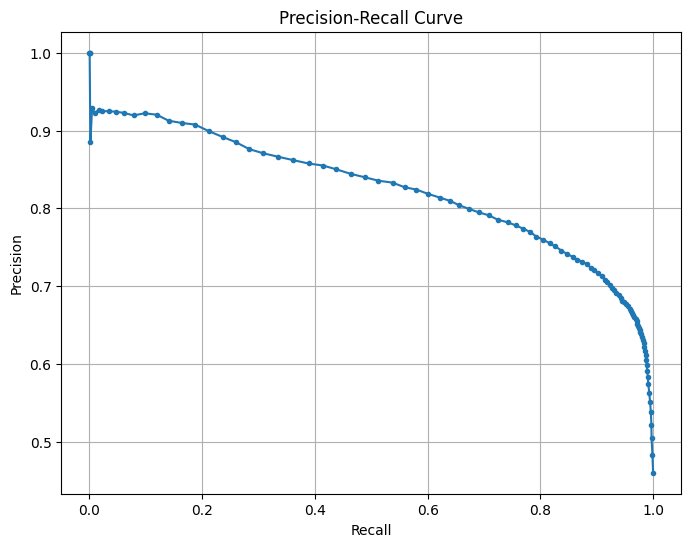

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have trained your model (for example, using RandomForestClassifier)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_scores = model.predict_proba(X_test)[:, 1]  # Scores for the positive class

# Actual true labels for the test set
y_true = y_test  # Replace this with your actual true labels

# Calculate precision and recall values
precision, recall, _ = precision_recall_curve(y_true, y_scores)

# Plot precision-recall curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [55]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from tqdm import tqdm

# # Assuming X and y are your features and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create the RandomForestClassifier
# rf = RandomForestClassifier()

# # Instantiate GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# # Fit the data to perform the grid search
# with tqdm(total=1, bar_format="{desc}: {percentage:3.0f}%|{bar}| {n_fmt}/{total_fmt} {postfix}", desc="GridSearchCV") as pbar:
#     grid_search.fit(X_train, y_train)
#     pbar.update()

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Fit a new model using the best parameters on the entire training dataset
# best_rf = RandomForestClassifier(**best_params)
# best_rf.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = best_rf.predict(X_test)

# # Evaluate the model performance
# from sklearn.metrics import classification_report, accuracy_score

# print("Best Parameters:", best_params)
# print("Best ROC AUC Score:", best_score)
# print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [56]:
# # Gradient Boosing

# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import roc_auc_score
# from tqdm import tqdm
# from sklearn.ensemble import GradientBoostingClassifier

# # Define number of splits for cross-validation
# n_splits = 10
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Initialize lists to store accuracy scores and best model
# acc_scores_gradient_boosting = []
# best_model_gradient_boosting = None
# best_acc_gradient_boosting = 0.0

# # Define your features and target variable
# X = X_resampled
# y = y_resampled.values.ravel()  # Reshape y into a 1D array

# # Define hyperparameters for Gradient Boosting Classifier
# params_gradient_boosting = {
#     'n_estimators': 1950,
#     'learning_rate': 0.019093223225293453,
#     'max_depth': 12,
#     'min_samples_split': 2,
#     'min_samples_leaf': 1,
#     'subsample': 0.8831564960046078,
#     'max_features': 'sqrt'
# }

# # Perform cross-validation and train Gradient Boosting Classifier
# for train_index, test_index in tqdm(skf.split(X, y), total=n_splits):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y[train_index], y[test_index]  # Ensure y is 1D here

#     # Initialize and train the Gradient Boosting Classifier
#     model = GradientBoostingClassifier(**params_gradient_boosting)
#     model.fit(X_train, y_train)

#     # Predict probabilities for the test set
#     y_pred_proba_gradient_boosting = model.predict_proba(X_test)[:, 1]

#     # Calculate ROC AUC score
#     acc = roc_auc_score(y_test, y_pred_proba_gradient_boosting)
#     acc_scores_gradient_boosting.append(acc)

#     # Store the best model based on the highest ROC AUC score
#     if acc > best_acc_gradient_boosting:
#         best_acc_gradient_boosting = acc
#         best_model_gradient_boosting = model

# # Print the best ROC AUC score and all AUC scores obtained from cross-validation
# print("Best ROC AUC Score (Gradient Boosting):", best_acc_gradient_boosting)
# print("AUC Scores (Gradient Boosting):", acc_scores_gradient_boosting)


In [57]:
# # Import necessary libraries for ROC curve
# from sklearn.metrics import roc_curve
# import matplotlib.pyplot as plt

# # Assuming you have collected the AUC scores for each model: 
# # acc_scores_xgboost_gpu, acc_scores_xgboost_cpu, acc_scores_gradient_boosting, acc_scores_rf

# # Assuming you have collected the predicted probabilities for each model: 
# # y_red_proba_xgboost_gpu, y_pred_proba_xgboost_cpu, y_pred_proba_gradient_boosting, y_pred_proba_rf

# # Calculate ROC curve for each model
# fpr_xgb_gpu, tpr_xgb_gpu, _ = roc_curve(y_test, y_pred_proba_xgboost_gpu)
# fpr_xgb_cpu, tpr_xgb_cpu, _ = roc_curve(y_test, y_pred_proba_xgboost_cpu)
# # fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gradient_boosting)
# fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

# # Plot ROC curve for each model
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_xgb_gpu, tpr_xgb_gpu, label='XGBoost GPU')
# plt.plot(fpr_xgb_cpu, tpr_xgb_cpu, label='XGBoost CPU')
# # plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
# plt.plot(fpr_rf, tpr_rf, label='Random Forest')
# plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Different Models')
# plt.legend()
# plt.grid()
# plt.show()

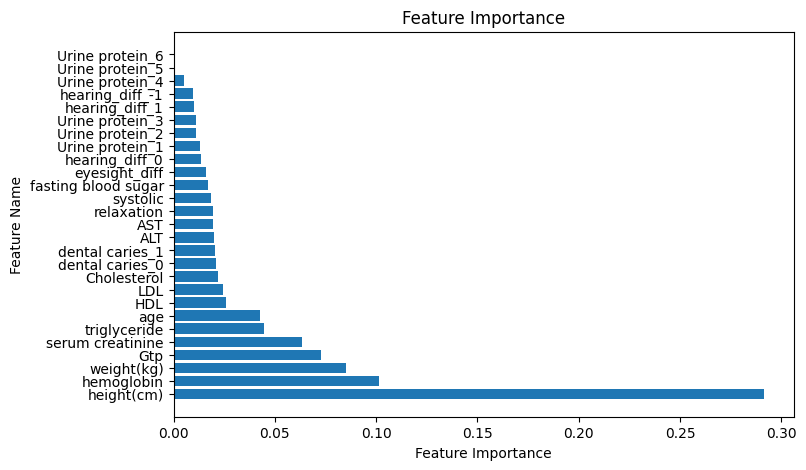

In [58]:
# Get feature importances and their corresponding names
feature_importances = best_model_xgboost_gpu.feature_importances_
feature_names = X.columns 

# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features based on their importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance_scores = zip(*sorted_feature_importance)
# Plotting the feature importance
plt.figure(figsize=(8, 5))
plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show()

In [59]:
# Model Inference

In [60]:
test_df

,hearing_diff_-1,hearing_diff_0,hearing_diff_1,Urine protein_1,Urine protein_2,Urine protein_3,Urine protein_4,Urine protein_5,Urine protein_6,dental caries_0,...,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,eyesight_diff
0,False,True,False,True,False,False,False,False,False,True,...,0.095238,0.806818,-0.263158,0.026316,-0.40,0.0,-0.555556,0.1875,0.192308,0.0
1,False,True,False,True,False,False,False,False,False,True,...,-0.571429,0.488636,-1.000000,-0.263158,-1.00,1.0,-0.444444,-0.6250,-0.115385,0.0
2,False,True,False,True,False,False,False,False,False,True,...,-0.833333,0.659091,-0.789474,-0.684211,0.20,2.5,1.555556,2.3750,0.346154,-0.5
3,False,True,False,True,False,False,False,False,False,False,...,0.404762,-0.772727,1.105263,0.368421,-0.25,-1.5,0.111111,-0.2500,-0.653846,-0.5
4,False,True,False,True,False,False,False,False,False,False,...,-0.619048,-0.170455,-0.789474,0.236842,0.75,0.5,0.666667,1.0625,0.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,False,True,False,True,False,False,False,False,False,True,...,0.690476,-0.375000,0.263158,0.921053,0.70,1.0,0.000000,0.5625,0.038462,-0.5
106167,False,True,False,False,True,False,False,False,False,True,...,-0.380952,0.806818,-0.526316,-0.368421,0.50,0.5,0.111111,0.5625,0.423077,0.0
106168,False,True,False,True,False,False,False,False,False,False,...,0.357143,-0.443182,-0.052632,0.736842,0.45,-0.5,1.000000,0.6250,-0.115385,0.0
106169,False,True,False,True,False,False,False,False,False,True,...,-0.500000,-0.386364,0.052632,-0.289474,-0.55,-1.5,2.000000,0.8750,0.192308,-0.5


In [61]:
y_pred = model.predict_proba(test_df)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [62]:
y_pred[:,1].shape

(106171,)

In [63]:
test_data

,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,eyesight_diff,hearing_diff
0,40,165,70,130,89,107,200,186,49,115,14.2,1,0.9,19,25,32,0,0.0,0
1,80,160,60,144,72,93,172,158,35,104,13.0,1,1.1,20,12,24,0,0.0,0
2,60,170,70,117,75,92,161,173,39,88,15.4,1,1.4,38,60,36,0,-0.1,0
3,40,160,50,116,62,91,213,47,75,128,14.5,1,0.6,25,18,10,1,-0.1,0
4,40,170,75,132,94,79,170,100,39,123,16.5,1,1.0,30,39,27,1,0.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,40,165,60,112,78,134,225,82,59,149,16.4,1,1.1,24,31,28,0,-0.1,0
106167,40,170,85,130,90,97,180,186,44,100,16.0,2,1.0,25,31,38,0,0.0,0
106168,35,170,85,131,86,106,211,76,53,142,15.9,1,0.8,33,32,24,1,0.0,0
106169,40,160,60,120,80,92,175,81,55,103,13.9,1,0.6,42,36,32,0,-0.1,0


In [64]:
submission_df = pd.DataFrame()
submission_df['id'] = test_id
submission_df['smoking'] = y_pred[:,1]
submission_df.head()

,id,smoking
0,159256,0.66
1,159257,0.27
2,159258,0.55
3,159259,0.00
4,159260,0.53


In [65]:
submission_df.to_csv('submission.csv',index = False)